In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [2]:
#X, y = load_boston(return_X_y=True)
boston_dataset=load_boston()
#X=np.array(X)
#y=np.array(y)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(100)



C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


In [3]:
X=boston[['AGE','RM']]
X=np.array(X)
#print(X)

Y=boston_dataset.target
Y=np.array(Y)

Y=Y.reshape(506,1)
#print(Y.shape)

In [4]:
class AdalineRegressor:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):
    #w=(x.T*x)^-1*x.T*y
    self.w=np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,Y_train))
    #print(self.w.shape)
    print(self.w)

  def predict(self,X_test):
    Y_pred=np.matmul(X_test,self.w)  
    return Y_pred

  def evaluate(self,X_test,Y_test):
    Y_pred=np.matmul(X_test,self.w)
    subtract=np.abs(Y_test-Y_pred)
    #return subtract

    #MAE
    MAE=np.mean(subtract)
    #print("MAE =",MAE)

    #MSE
    MSE=np.mean(np.square(subtract))

    #LLS
    
    return MAE,MSE



In [5]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [6]:
model=AdalineRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
MAE,MSE=model.evaluate(X_test,y_test)
print("MAE =",MAE)
print("MSE =",MSE)
#print(y_pred)


[[-0.11782797]
 [ 4.92265742]]
MAE = 4.496512847727149
MSE = 43.36388887645206


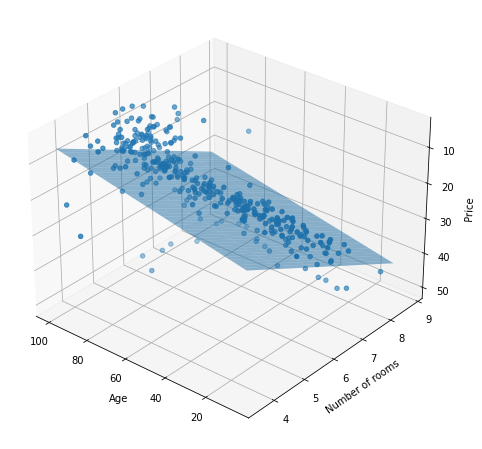

In [7]:

#plot 3d plane
fig = plt.figure(figsize=(8,8))
p = fig.add_subplot(111,projection='3d')

x = np.arange(X_train[:,0].min(), X_train[:,0].max())
y = np.arange(X_train[:,1].min(), X_train[:,1].max())

x, y = np.meshgrid(x, y)

plane = x *model.w[0] + y *model. w[1]

p.plot_surface(x, y, plane,alpha=0.5)

p.scatter(X_train[:,0], X_train[:,1], y_train)

p.set_xlabel('Age')
p.set_ylabel('Number of rooms')#RM
p.set_zlabel('Price')
p.view_init(-150,50)#angle of the plane
plt.show()

